In [27]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from CNN_Net import Net
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import cv2

In [2]:
# Optimizer and Loss Function
net = Net()

In [3]:
#load weights
net.load_state_dict(torch.load('checkpoints/test.pt'))

<All keys matched successfully>

In [4]:
# Dataloaders
transform = transforms.Compose(
[transforms.ToTensor()])
testset = torchvision.datasets.MNIST(root = './data', train = False,
                                       download = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 1,
                                         shuffle = False, num_workers = 2)

In [5]:
idx = 2

In [7]:
#prediction
print('label is: ', testset[idx][1])
out = net.forward(testset[idx][0].unsqueeze(0))
_, predicted = torch.max(out.data, 1)
print('predict value: ', int(predicted[0]))

label is:  1
predict value:  1


In [74]:
# Evaluating the results
correct_num, total_num = 0, 0
predictions = []
net.eval()
wrong_list = []
wrong_index = []
for i, data in enumerate(testloader, 0):
    inputs, labels = data
    outputs = net(inputs)
    _, predicted = torch.max(outputs.data, 1)
    predictions.append(outputs)
    total_num += labels.size(0)
    if predicted != labels:
        print('index ', i, ' : predict number: ', int(predicted), '. Its label is: ', int(labels))
        wrong_list.append(int(labels))
        wrong_index.append(int(i))
    correct_num += (predicted == labels).sum().item()
    
print('ACC of testset: ', (correct_num / total_num * 100))

index  18  : predict number:  8 . Its label is:  3
index  259  : predict number:  0 . Its label is:  6
index  321  : predict number:  7 . Its label is:  2
index  326  : predict number:  1 . Its label is:  2
index  449  : predict number:  5 . Its label is:  3
index  492  : predict number:  8 . Its label is:  2
index  582  : predict number:  2 . Its label is:  8
index  583  : predict number:  7 . Its label is:  2
index  659  : predict number:  1 . Its label is:  2
index  740  : predict number:  9 . Its label is:  4
index  813  : predict number:  8 . Its label is:  9
index  882  : predict number:  7 . Its label is:  9
index  883  : predict number:  5 . Its label is:  3
index  947  : predict number:  9 . Its label is:  8
index  1014  : predict number:  5 . Its label is:  6
index  1039  : predict number:  2 . Its label is:  7
index  1112  : predict number:  6 . Its label is:  4
index  1226  : predict number:  2 . Its label is:  7
index  1232  : predict number:  4 . Its label is:  9
index  1

In [39]:
img = cv2.imread('paper.png', 0)
to_pil_image = transforms.ToPILImage()
to_Tensor = transforms.ToTensor()
img = to_pil_image(img)
new_img=img.resize((28,28),Image.BILINEAR)
new_img.save('new_img.png')
img = to_Tensor(new_img)
print(img.shape)

torch.Size([1, 28, 28])


In [40]:
out = net.forward(to_Tensor(new_img).unsqueeze(0))
_, predicted = torch.max(out.data, 1)
print('predict value: ', int(predicted[0]))

predict value:  1


6


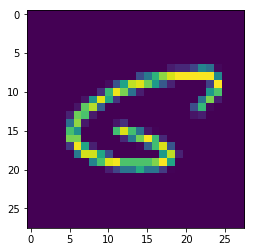

In [89]:
index = wrong_index[14]
print(testset[index][1])
plt.imshow(testset[index][0].squeeze(0))